In [1]:
import numpy as np

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers.convolutional import Convolution2D, MaxPooling2D


Using Theano backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [18]:
datagen = ImageDataGenerator(
            rotation_range=40,
            width_shift_range=0.2, 
            height_shift_range=0.2, 
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

img = load_img('data/train/cats/cat.0.jpg') # this is a PIL image

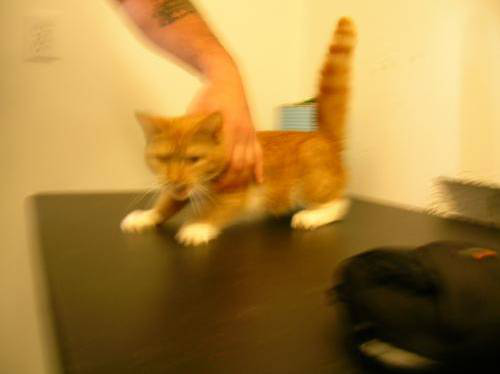

In [19]:
img

In [20]:
type(img)

PIL.Image.Image

In [21]:
x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150, 150)

In [14]:
x

array([[[[ 203.,  203.,  204., ...,  240.,  239.,  238.],
         [ 203.,  203.,  204., ...,  241.,  240.,  238.],
         [ 203.,  203.,  204., ...,  241.,  240.,  239.],
         ..., 
         [ 153.,  153.,  153., ...,    2.,    2.,    2.],
         [ 152.,  152.,  152., ...,    2.,    2.,    2.],
         [ 151.,  151.,  151., ...,    1.,    1.,    1.]],

        [[ 164.,  164.,  165., ...,  201.,  200.,  199.],
         [ 164.,  164.,  165., ...,  202.,  201.,  199.],
         [ 164.,  164.,  165., ...,  202.,  201.,  200.],
         ..., 
         [ 122.,  122.,  122., ...,    2.,    2.,    2.],
         [ 121.,  121.,  121., ...,    2.,    2.,    2.],
         [ 120.,  120.,  120., ...,    1.,    1.,    1.]],

        [[  87.,   87.,   88., ...,  122.,  121.,  120.],
         [  87.,   87.,   88., ...,  123.,  122.,  120.],
         [  87.,   87.,   88., ...,  123.,  122.,  121.],
         ..., 
         [  55.,   55.,   55., ...,    0.,    0.,    0.],
         [  54.,   54.,

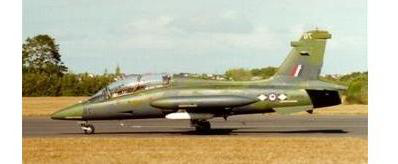

In [12]:
img2 = load_img('50_categories/airplanes/airplanes_0001.jpg')
img2

In [13]:
x2 = img_to_array(img2) # this is a Numpy array with shape (3, 150, 150)
x2 = x2.reshape((1,) + x2.shape) # this is a Numpy array with shape (1, 3, 150, 150)

In [25]:
datagen.flow?

In [23]:
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

FileNotFoundError: [Errno 2] No such file or directory: 'preview/cat_0_5540.jpeg'

In [17]:
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the 'preview/' directory
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break # otherwise the generator would loop indefinitely

FileNotFoundError: [Errno 2] No such file or directory: 'preview/cat_0_7191.jpeg'

In [27]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('data/train/cats/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

FileNotFoundError: [Errno 2] No such file or directory: 'preview/cat_0_254.jpeg'

In [42]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('data/train/cats/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,save_to_dir='data/preview', save_prefix='cat', save_format='jpeg'):
    print(batch)
    print(type(batch))
    print(batch.shape)
    #print(array_to_img(batch))
    i += 1
    if i > 60:
        break  # otherwise the generator would loop indefinitely

[[[[ 246.  247.  250. ...,   86.   86.   88.]
   [ 247.  246.  247. ...,   86.   88.   90.]
   [ 247.  246.  247. ...,   88.   90.   92.]
   ..., 
   [ 199.  199.  200. ...,    5.    5.    2.]
   [ 199.  200.  200. ...,    5.    5.    5.]
   [ 200.  200.  200. ...,    5.    5.    5.]]

  [[ 206.  211.  215. ...,   63.   63.   65.]
   [ 204.  206.  211. ...,   63.   65.   67.]
   [ 204.  206.  211. ...,   65.   67.   69.]
   ..., 
   [ 160.  160.  161. ...,    6.    6.    3.]
   [ 160.  161.  161. ...,    6.    6.    6.]
   [ 161.  161.  161. ...,    6.    6.    6.]]

  [[ 110.  115.  121. ...,   13.   13.   15.]
   [ 109.  110.  115. ...,   13.   15.   17.]
   [ 109.  110.  115. ...,   15.   17.   19.]
   ..., 
   [  81.   81.   82. ...,    1.    1.    0.]
   [  81.   82.   82. ...,    1.    1.    1.]
   [  82.   82.   82. ...,    1.    1.    1.]]]]
<class 'numpy.ndarray'>
(1, 3, 374, 500)
[[[[ 203.  203.  203. ...,  248.  248.  248.]
   [ 203.  203.  203. ...,  248.  248.  248.]
   [ 

In [43]:
!ls data

preview    train      validation


In [45]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [51]:
# Creating a simple stack of 3 convolution layers with a ReLU activation and followed 
# by max-pooling layers
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape = (3, 150, 150)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [52]:
# Adding 2 fully-connected layers on top
# Finally, we end the model with a single unit and a sigmoid acitvtion, which is perfect for a binary classificaiton
# To go with it, we will also use the binary_crossentroyp loss to train our model

model.add(Flatten()) # This converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid')) # Change this for multiclass classificaiton - to softmax

model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Change this to loss to categorical_crossentropy

## Training

In [53]:
# Augmentation Configuration we will use for training
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True)

In [54]:
# this is the augmentation configuration we will use for testing:
# Only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [56]:
# Generator that will read pictures found in subfolers of "data/train', and 
# indesingitely generate batches of augmented image data
train_generator = train_datagen.flow_from_directory(
                            'data/train', # target directory
                            target_size=(150, 150), # all images will be resized to 150x150
                            batch_size=32, 
                            class_mode = 'binary') # since we use binary_crossentropy loss, we need binary labels
# similar for validation data
validation_generator = test_datagen.flow_from_directory(
                                    'data/validation',
                                    target_size = (150, 150),
                                    batch_size=32,
                                    class_mode='binary')

Found 2254 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [57]:
# Now, we can use the generators to train our model
model.fit_generator(train_generator,
                   samples_per_epoch=2000,
                   nb_epoch=50,
                   validation_data=validation_generator,
                   nb_val_samples=800)
model.save_weights('first_try.h5')

Epoch 1/50
2016/2000 [==============================] - 133s - loss: 0.7022 - acc: 0.5441 - val_loss: 0.7006 - val_acc: 0.5337
Epoch 2/50
2030/2000 [==============================] - 125s - loss: 0.6747 - acc: 0.5695 - val_loss: 0.6637 - val_acc: 0.5863
Epoch 3/50
2030/2000 [==============================] - 111s - loss: 0.6521 - acc: 0.6212 - val_loss: 0.6167 - val_acc: 0.6388
Epoch 4/50
2030/2000 [==============================] - 108s - loss: 0.6284 - acc: 0.6433 - val_loss: 0.6487 - val_acc: 0.6188
Epoch 5/50
2030/2000 [==============================] - 111s - loss: 0.6167 - acc: 0.6601 - val_loss: 0.6087 - val_acc: 0.6587
Epoch 6/50
2030/2000 [==============================] - 112s - loss: 0.5846 - acc: 0.6852 - val_loss: 0.6156 - val_acc: 0.6587
Epoch 7/50
2030/2000 [==============================] - 108s - loss: 0.6056 - acc: 0.6837 - val_loss: 0.6075 - val_acc: 0.6663
Epoch 8/50
2030/2000 [==============================] - 106s - loss: 0.5866 - acc: 0.7089 - val_loss: 0.5536 - 

//anaconda/lib/python3.5/site-packages/keras/engine/training.py:1432: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


# Training a small convnet from scratch: 8% accuracy in 40 lines of code

In [44]:
# We must prevent overfitting given the relatively small dataset
# -> Data Augmentation + Modulate Entropic Capacity
# -> number of parameters + weight regularization -> L1 & L2

# Model 1 - Small convent with only a few layers and few filters per layer


# Full Model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch = 50


model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(3, img_width, img_height)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='binary')

model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

model.load_weights('first_try.h5')

In [ ]:
'''This script goes along the blog post
"Building powerful image classification models using very little data"
from blog.keras.io.
It uses data that can be downloaded at:
https://www.kaggle.com/c/dogs-vs-cats/data
In our setup, we:
- created a data/ folder
- created train/ and validation/ subfolders inside data/
- created cats/ and dogs/ subfolders inside train/ and validation/
- put the cat pictures index 0-999 in data/train/cats
- put the cat pictures index 1000-1400 in data/validation/cats
- put the dogs pictures index 12500-13499 in data/train/dogs
- put the dog pictures index 13500-13900 in data/validation/dogs
So that we have 1000 training examples for each class, and 400 validation examples for each class.
In summary, this is our directory structure:
```
data/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
```
'''
import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense

# path to the model weights file.
weights_path = '../keras/examples/vgg16_weights.h5'
top_model_weights_path = 'bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch = 50


def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1./255)

    # build the VGG16 network
    model = Sequential()
    model.add(ZeroPadding2D((1, 1), input_shape=(3, img_width, img_height)))

    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
    model.add(ZeroPadding2D((1, 1)))
    model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # load the weights of the VGG16 networks
    # (trained on ImageNet, won the ILSVRC competition in 2014)
    # note: when there is a complete match between your model definition
    # and your weight savefile, you can simply call model.load_weights(filename)
    assert os.path.exists(weights_path), 'Model weights not found (see "weights_path" variable in script).'
    f = h5py.File(weights_path)
    for k in range(f.attrs['nb_layers']):
        if k >= len(model.layers):
            # we don't look at the last (fully-connected) layers in the savefile
            break
        g = f['layer_{}'.format(k)]
        weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
        model.layers[k].set_weights(weights)
    f.close()
    print('Model loaded.')

    generator = datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=32,
            class_mode=None,
            shuffle=False)
    bottleneck_features_train = model.predict_generator(generator, nb_train_samples)
    np.save(open('bottleneck_features_train.npy', 'w'), bottleneck_features_train)

    generator = datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=32,
            class_mode=None,
            shuffle=False)
    bottleneck_features_validation = model.predict_generator(generator, nb_validation_samples)
    np.save(open('bottleneck_features_validation.npy', 'w'), bottleneck_features_validation)


def train_top_model():
    train_data = np.load(open('bottleneck_features_train.npy'))
    train_labels = np.array([0] * (nb_train_samples / 2) + [1] * (nb_train_samples / 2))

    validation_data = np.load(open('bottleneck_features_validation.npy'))
    validation_labels = np.array([0] * (nb_validation_samples / 2) + [1] * (nb_validation_samples / 2))

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              nb_epoch=nb_epoch, batch_size=32,
              validation_data=(validation_data, validation_labels))
    model.save_weights(top_model_weights_path)


save_bottlebeck_features()
train_top_model()

In [ ]:
'''This script goes along the blog post
"Building powerful image classification models using very little data"
from blog.keras.io.
It uses data that can be downloaded at:
https://www.kaggle.com/c/dogs-vs-cats/data
In our setup, we:
- created a data/ folder
- created train/ and validation/ subfolders inside data/
- created cats/ and dogs/ subfolders inside train/ and validation/
- put the cat pictures index 0-999 in data/train/cats
- put the cat pictures index 1000-1400 in data/validation/cats
- put the dogs pictures index 12500-13499 in data/train/dogs
- put the dog pictures index 13500-13900 in data/validation/dogs
So that we have 1000 training examples for each class, and 400 validation examples for each class.
In summary, this is our directory structure:
```
data/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
```
'''

import os
import h5py
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense

# path to the model weights files.
weights_path = '../keras/examples/vgg16_weights.h5'
top_model_weights_path = 'fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
nb_epoch = 50

# build the VGG16 network
model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(3, img_width, img_height)))

model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# load the weights of the VGG16 networks
# (trained on ImageNet, won the ILSVRC competition in 2014)
# note: when there is a complete match between your model definition
# and your weight savefile, you can simply call model.load_weights(filename)
assert os.path.exists(weights_path), 'Model weights not found (see "weights_path" variable in script).'
f = h5py.File(weights_path)
for k in range(f.attrs['nb_layers']):
    if k >= len(model.layers):
        # we don't look at the last (fully-connected) layers in the savefile
        break
    g = f['layer_{}'.format(k)]
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    model.layers[k].set_weights(weights)
f.close()
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
model.add(top_model)

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_height, img_width),
        batch_size=32,
        class_mode='binary')

# fine-tune the model
model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)